In [1]:
# Train YOLOv11 on Full Body Gender Dataset

In [2]:
import sys
%pip install uv
!uv pip install --python "{sys.executable}" ultralytics torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu121

Note: you may need to restart the kernel to use updated packages.


Using Python 3.10.11 environment at: c:\Users\dipta\Downloads\projects\qbms\.venv
Audited 4 packages in 22ms


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo12s.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="Full Body Gender Classification Dataset.v1i.yolov11/data.yaml", epochs=400, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.246 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.235  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Full Body Gender Classification Dataset.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=400, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, mul

In [3]:
from ultralytics import YOLO

In [1]:
from ultralytics import YOLO

# Load the model
model = YOLO("best.pt")

# Run tracking
# source=0: Webcam
# show=True: Display the video with annotations
# stream=True: Return a generator for processing frames
results = model.track(source=0, tracker="bytetrack.yaml", show=True, stream=True)

# List to store data for the current frame
current_frame_data = []

try:
    for result in results:
        # Reset list for the new frame
        current_frame_data = []
        
        # Check if boxes exist in the result
        if result.boxes is not None:
            # Iterate over each detected box
            for box in result.boxes:
                # Extract data
                # id might be None if tracking hasn't initialized an ID yet
                track_id = int(box.id.item()) if box.id is not None else None
                class_id = int(box.cls.item())
                bbox = box.xyxy.tolist()[0] # [x1, y1, x2, y2]
                
                # Create a dictionary for the object
                obj_data = {
                    "track_id": track_id,
                    "class_id": class_id,
                    "bbox": bbox
                }
                
                current_frame_data.append(obj_data)
        
        # 'current_frame_data' now contains all tracking info for this frame
        # You can access it here
        print(current_frame_data)
        
except KeyboardInterrupt:
    print("Stopped by user")


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

0: 480x640 1 man, 661.1ms
0: 480x640 1 man, 661.1ms
[{'track_id': 1, 'class_id': 0, 'bbox': [75.9212646484375, 202.52093505859375, 627.2763671875, 480.0]}]
0: 480x640 1 man, 17.6ms
[{'track_id': 1, 'class_id': 0, 'bbox': [75.9212646484375, 202.52093505859375, 627.2763671875, 480.0]}]
0: 480x640 1 man, 17.6ms
[{'track_id': 1, 'class_id': 0, 'bbox': [75.92201232910156, 202.1828155517578, 626.9855346679688, 479.66064453125]}]
0: 480x640 1 man, 17.9ms
[{'track_id': 1, 'class_id': 0, 'bbox': [75.92201232910156, 202.1828155517578, 626.9855346679688, 479.66064453125]}]
0: 480x640 1 man, 17.9ms
[{'track_id': 1, 'class_id': 0, 'bbox': [76.82958984375, 201.89566040039062, 627.9061279296875, 479.6021423339844]}]
0: 480x640 1 man, 13.2ms
[{'track_id': 1, 'class_id': 0, 'bbox': [76.82958984375, 201.89566040039062, 627.9061279296875, 479.6021423339844]}]
0: 480x640 1 man, 13

In [2]:
import psycopg2

In [14]:
import psycopg2
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="diptanshu",
    dbname="salesloss"
)

In [15]:
from psycopg2.extras import DictCursor
cur = conn.cursor(cursor_factory=DictCursor)


In [16]:
cur.execute("select * from tracking ;")

In [17]:
cur.fetchall()

[]

# Writing Torch Cnn baseline for the classifier 


Fixing Dataset

In [23]:
import cv2

In [25]:
import os
images_path = os.listdir("Full Body Gender Classification Dataset.v1i.yolov11/train/images")
labels_path = os.listdir("Full Body Gender Classification Dataset.v1i.yolov11/train/labels")

In [32]:
images_path  = sorted(images_path)

In [31]:
labels_path = sorted(labels_path)

In [ ]:
cv2.cr

In [ ]:

for img_file, label_file in zip(images_path, labels_path):
    img = cv2.imread(os.path.join(images_path, img_file))
    with open(os.path.join(labels_path, label_file), 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            
            img_height, img_width, _ = img.shape
            
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

In [ ]:
import torch
import numpy as np

In [33]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [118]:
class DataLoader(Dataset):
    def __init__(self, im_parent_dir, label_parent_dir, images_path, labels_path, transform=None):
        self.images_path = images_path
        self.labels_path = labels_path
        self.im_parent_dir = im_parent_dir
        self.label_parent_dir = label_parent_dir
        self.transform = transform

    def __len__(self):
        return len(self.images_path)

    def __getitem__(self, idx):
        img_path = os.path.join(self.im_parent_dir, self.images_path[idx])
        label_path = os.path.join(self.label_parent_dir, self.labels_path[idx])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB
        
        cropped_all = [] 
        boxes = []
        
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                
                img_height, img_width, _ = image.shape
                
                x1 = int((x_center - width / 2) * img_width)
                y1 = int((y_center - height / 2) * img_height)
                x2 = int((x_center + width / 2) * img_width)
                y2 = int((y_center + height / 2) * img_height)
                
                # Clamp coordinates to image boundaries
                x1 = max(0, x1)
                y1 = max(0, y1)
                x2 = min(img_width, x2)
                y2 = min(img_height, y2)
                
                if x2 > x1 and y2 > y1:
                    crop = image[y1:y2, x1:x2]
                    crop = cv2.resize(crop, (64, 64))
                    cropped_all.append(crop)                
                    boxes.append(class_id)
                    
        if not cropped_all:
            return torch.empty((0, 3, 64, 64)), torch.empty((0), dtype=torch.long)
            
        # Normalize to 0-1 by dividing by 255.0
        return torch.tensor(np.array(cropped_all), dtype=torch.float32).permute(0, 3, 1, 2) / 255.0, torch.tensor(boxes, dtype=torch.long)

In [119]:
loader = DataLoader(im_parent_dir="Full Body Gender Classification Dataset.v1i.yolov11/train/images" , label_parent_dir="Full Body Gender Classification Dataset.v1i.yolov11/train/labels", images_path=images_path, labels_path=labels_path)

In [129]:
import numpy as np

In [130]:
img , lab = loader.__getitem__(10)

In [131]:
img.shape

torch.Size([1, 3, 64, 64])

In [132]:
lab.shape

torch.Size([1])

In [133]:
import torch
from torch.nn import Module
from torch.nn import Conv2d , MaxPool2d , Linear , CrossEntropyLoss

In [134]:
class CnnBase(Module):
    def __init__(self):
        super(CnnBase , self).__init__()
        self.conv1 = Conv2d(3,16,3,padding=1)
        self.pool = MaxPool2d(2,2)
        self.conv2 = Conv2d(16,32,3,padding=1)
        self.conv3 = Conv2d(32,64,3,padding=1)
        self.fc1 = Linear(64*8*8 , 512)
        self.fc2 = Linear(512 , 2)
        self.loss_function = CrossEntropyLoss()
        
    def forward(self,x,labels=None):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.reshape(-1 , 64*8*8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        
        if labels is not None:
            loss = self.loss_function(x, labels)
            return x, loss
        return x

In [135]:
model = CnnBase()

In [136]:
model.forward(img).shape

torch.Size([1, 2])

In [137]:
from tqdm import tqdm

In [138]:
! pip install tqdm 

In [139]:
# Setup Validation Loader
val_images_path = sorted(os.listdir("Full Body Gender Classification Dataset.v1i.yolov11/valid/images"))
val_labels_path = sorted(os.listdir("Full Body Gender Classification Dataset.v1i.yolov11/valid/labels"))

val_loader = DataLoader(
    im_parent_dir="Full Body Gender Classification Dataset.v1i.yolov11/valid/images",
    label_parent_dir="Full Body Gender Classification Dataset.v1i.yolov11/valid/labels",
    images_path=val_images_path,
    labels_path=val_labels_path
)

In [140]:
import random

def train(model, learning_rate, train_loader, val_loader, epochs=10):
    optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_loss = 0
        
        # Shuffle the indices for better training
        indices = list(range(len(train_loader)))
        random.shuffle(indices)
        
        pbar = tqdm(indices)
        
        for i in pbar:
            imgs, labs = train_loader.__getitem__(i)
            
            # Skip empty batches
            if len(imgs) == 0:
                continue
                
            # Forward pass (returns logits, loss)
            outputs, loss = model.forward(imgs, labs)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            train_loss += loss.item()
            pbar.set_description(f"Epoch {epoch+1} Train Loss: {loss.item():.2f}")
            
        avg_train_loss = train_loss / len(train_loader)
        
        # Validation Phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for i in range(len(val_loader)):
                imgs, labs = val_loader.__getitem__(i)
                if len(imgs) == 0:
                    continue
                
                outputs, loss = model.forward(imgs, labs)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                total += labs.size(0)
                correct += (predicted == labs).sum().item()
        
        avg_val_loss = val_loss / len(val_loader)
        accuracy = 100 * correct / total if total > 0 else 0
        
        print(f"Epoch {epoch+1} Summary - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {accuracy:.2f}%")

In [141]:
train(model=model, learning_rate=0.001, train_loader=loader, val_loader=val_loader)

Epoch 1 Train Loss: 0.06: 100%|██████████| 2874/2874 [00:51<00:00, 55.81it/s]


Epoch 1 Summary - Train Loss: 0.3221, Val Loss: 0.1434, Val Acc: 94.95%


Epoch 2 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:47<00:00, 60.43it/s] 


Epoch 2 Summary - Train Loss: 0.1485, Val Loss: 0.1759, Val Acc: 94.95%


Epoch 3 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:48<00:00, 59.50it/s]


Epoch 3 Summary - Train Loss: 0.0847, Val Loss: 0.2689, Val Acc: 94.22%


Epoch 4 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:51<00:00, 56.28it/s] 


Epoch 4 Summary - Train Loss: 0.0491, Val Loss: 0.2388, Val Acc: 93.86%


Epoch 5 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:48<00:00, 59.23it/s] 


Epoch 5 Summary - Train Loss: 0.0334, Val Loss: 0.3090, Val Acc: 94.22%


Epoch 6 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:47<00:00, 60.67it/s]


Epoch 6 Summary - Train Loss: 0.0226, Val Loss: 0.2395, Val Acc: 95.31%


Epoch 7 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:47<00:00, 60.21it/s]


Epoch 7 Summary - Train Loss: 0.0205, Val Loss: 0.5084, Val Acc: 93.14%


Epoch 8 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:48<00:00, 59.56it/s]


Epoch 8 Summary - Train Loss: 0.0116, Val Loss: 0.3759, Val Acc: 94.22%


Epoch 9 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:47<00:00, 59.95it/s] 


Epoch 9 Summary - Train Loss: 0.0217, Val Loss: 0.4462, Val Acc: 94.58%


Epoch 10 Train Loss: 0.00: 100%|██████████| 2874/2874 [00:47<00:00, 60.13it/s]


Epoch 10 Summary - Train Loss: 0.0093, Val Loss: 0.4128, Val Acc: 95.67%


In [142]:
torch.save(model.state_dict(), "cnn_weights.pth")

In [143]:
model = CnnBase()   # same class, same layers


In [144]:
state_dict = torch.load("cnn_weights.pth", map_location="cpu")
model.load_state_dict(state_dict)


<All keys matched successfully>

Image 61: Found 1 objects


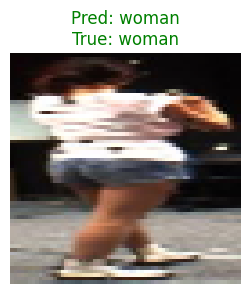

Image 109: Found 1 objects


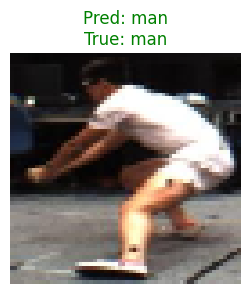

Image 102: Found 1 objects


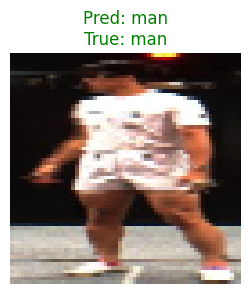

Image 18: Found 1 objects


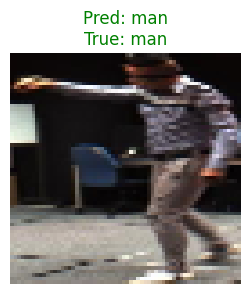

Image 15: Found 1 objects


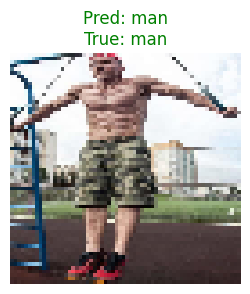

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# Class names from data.yaml
CLASS_NAMES = ['man', 'woman']

# Setup Test Loader
test_images_path = sorted(os.listdir("Full Body Gender Classification Dataset.v1i.yolov11/test/images"))
test_labels_path = sorted(os.listdir("Full Body Gender Classification Dataset.v1i.yolov11/test/labels"))

test_loader = DataLoader(
    im_parent_dir="Full Body Gender Classification Dataset.v1i.yolov11/test/images",
    label_parent_dir="Full Body Gender Classification Dataset.v1i.yolov11/test/labels",
    images_path=test_images_path,
    labels_path=test_labels_path
)

def visualize_inference(model, loader, num_samples=5):
    model.eval()
    indices = list(range(len(loader)))
    random.shuffle(indices)
    
    samples_shown = 0
    for idx in indices:
        if samples_shown >= num_samples:
            break
            
        imgs, labs = loader.__getitem__(idx)
        
        # Skip if no objects in this image
        if len(imgs) == 0:
            continue
            
        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            
        # Plotting
        n_crops = len(imgs)
        fig, axes = plt.subplots(1, n_crops, figsize=(n_crops * 3, 3))
        if n_crops == 1:
            axes = [axes]
            
        print(f"Image {idx}: Found {n_crops} objects")
        
        for i, ax in enumerate(axes):
            # Convert (C, H, W) -> (H, W, C) for matplotlib
            img_np = imgs[i].permute(1, 2, 0).numpy()
            
            pred_label = CLASS_NAMES[preds[i].item()]
            true_label = CLASS_NAMES[labs[i].item()]
            
            ax.imshow(img_np)
            ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", color=("green" if preds[i]==labs[i] else "red"))
            ax.axis('off')
            
        plt.show()
        samples_shown += 1

# Run visualization
visualize_inference(model, test_loader)

In [ ]:
!pip install matplotlib

In [146]:
def evaluate_accuracy(model, loader, name="Test"):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for i in range(len(loader)):
            imgs, labs = loader.__getitem__(i)
            if len(imgs) == 0:
                continue
            
            outputs = model(imgs)
            _, predicted = torch.max(outputs.data, 1)
            total += labs.size(0)
            correct += (predicted == labs).sum().item()
    
    acc = 100 * correct / total if total > 0 else 0
    print(f"{name} Set Accuracy: {acc:.2f}%")

evaluate_accuracy(model, test_loader, "Test")

Test Set Accuracy: 91.18%
